# Atividade da Semana 02 da ELT575

Repita o exemplo Image_classification_CNN usando o dataset CIFAR-10 (https://www.tensorflow.org/datasets/catalog/cifar10), também disponível no Tensorflow. As imagens agora tem a forma 32 x 32 x 3, sendo necessário fazer ajustes na rede para esse caso. Recomendado executar usando o recurso de GPU do Colab agilizar os treinamentos das redes.

Houve muita diferença no desempenho da rede treinada quando comparado ao exemplo?

Experimente adicionar mais dois blocos de camadas Conv2D (64 filtros 3x3 - relu) + MaxPooling (2 x 2) antes da camada Flatten e compare os resultados.

Função: [Clique Aqui](#scrollTo=4c165674)
Resultado: [Clique Aqui](#scrollTo=f13560fc)

Seguindo o modelo modificado no item anterior, experimente adicionar um Dropout de 20% após cada camada
MaxPooling.

Função: [Clique Aqui](#scrollTo=d56c2f2b)
Resultado: [Clique Aqui](#scrollTo=6a12696f)


Comente os resultados obtidos.

In [ ]:
%pip --version

pip 24.1.2 from /home/romildopaiter/ml/cnn/lib/python3.12/site-packages/pip (python 3.12)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# %pip install tensorflow

In [ ]:
# pip install --upgrade keras

In [ ]:
import keras
import numpy as np
import tensorflow as tf
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.model_selection import KFold

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [ ]:
# Tipos de veiculos
labels_df = pd.DataFrame(test_images)
labels_df.max()

0    9
dtype: uint8

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Label number: 9
Label description: truck


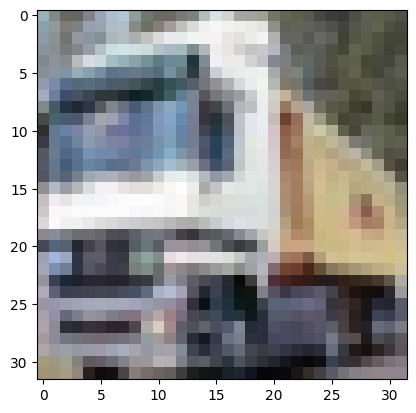

In [ ]:
index = 1

plt.imshow(train_images[index])
print("Label number: %s" % train_labels[index][0])
print("Label description: %s" % class_names[train_labels[index][0]])

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

### Definindo um metodo para contrução do modelo

In [ ]:
from keras.datasets import mnist, cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

In [ ]:
# definindo modelo original
def define_model():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  # compilando modelo
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# Expererimento de um modelo não tradicional para gerar o modelo aumento da acuracia
def define_model_performance():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))  # Adicionado Dropout

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))  # Adicionado Dropout

    model.add(keras.layers.GlobalAveragePooling2D())  # Alterado para GlobalAveragePooling2D
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))  # Adicionado Dropout
    model.add(Dense(10, activation='softmax'))

    # compilando modelo
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # Reduce learning rate when a metric has stopped improving
    lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

    return model, lr_reduction

model_performance, lr_reuction = define_model_performance()

In [ ]:
# Experimente adicionar mais dois blocos de camadas Conv2D (64 filtros 3x3 - relu) + MaxPooling (2 x 2)
# antes da camada Flatten e compare os resultados.
def define_model_atividade_um():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(keras.layers.GlobalAveragePooling2D())  # Alterado para GlobalAveragePooling2D
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))  # Adicionado Dropout
    model.add(Dense(10, activation='softmax'))

    # compilando modelo
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # Reduce learning rate when a metric has stopped improving
    lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

    return model, lr_reduction

model_atividade_um, lr_reuction_um = define_model_atividade_um()

In [ ]:
# Seguindo o modelo modificado no item anterior, experimente adicionar um Dropout de 20% após cada
# camada MaxPooling.

def define_model_atividade_dois_dropout():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))  # Adicionado Dropout

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))  # Adicionado Dropout

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(keras.layers.GlobalAveragePooling2D())  # Alterado para GlobalAveragePooling2D
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5, seed=42))  # Adicionado Dropout
    model.add(Dense(10, activation='softmax'))

    # compilando modelo
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # Reduce learning rate when a metric has stopped improving
    lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

    return model, lr_reduction

model_atividade_dois, lr_reuction_dois = define_model_atividade_dois_dropout()

/home/romildopaiter/ml/cnn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Tratamento os dados

In [ ]:
# (X_train,y_train), (X_test,y_test)

# fazendo um reshape no dataset para ter um único canal
trainX = train_images.reshape((train_images.shape[0], 32, 32, 3))
testX = test_images.reshape((test_images.shape[0], 32, 32, 3))

# Convertendo valores dos pixels em float
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# normalização para escala [0-1]
trainX = trainX / 255.0
testX = testX / 255.0

# transformando a variável alvo (target) para uma codificação one hot
trainY = keras.utils.to_categorical(train_labels)
testY = keras.utils.to_categorical(test_labels)

## Realizando o Treinamento

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
def evaluate_model(model, callback=[callback]):
    scores = []
    histories = []

    # definindo a validação k-fold
    kfold = KFold(5, shuffle=True, random_state=1)

    # loop para as k-folds (cada fold usa subconjuntos de treino e teste diferentes)
    for train_ix, test_ix in kfold.split(trainX):

        # recorta dados de acordo com índices da k-fold
        train_data, train_target, val_data, val_target = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]

        # treinamento do modelo
        history = model.fit(train_data, train_target,
                            epochs=10, batch_size=64,
                            validation_data=(val_data, val_target),
                            callbacks=callback,
                            verbose=1)

        # desempenho do modelo
        _, acc = model.evaluate(val_data, val_target, verbose=0)
        print('> %.3f' % (acc * 100.0))

        # armazena resultados de cada modelo treinado dentro da k-fold
        scores.append(acc)
        histories.append(history)

    print('#' * 10 + ' RESULTADO ' + '#' * 10)
    print('Acurácia: média=%.3f desvio=%.3f' % (np.mean(scores)*100, np.std(scores)*100))
    plt.boxplot(scores)
    plt.show()

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.4450 - loss: 1.5929 - val_accuracy: 0.5265 - val_loss: 1.3391
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6539 - loss: 0.9837 - val_accuracy: 0.6000 - val_loss: 1.1733
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7449 - loss: 0.7405 - val_accuracy: 0.5847 - val_loss: 1.3896
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8224 - loss: 0.5184 - val_accuracy: 0.5849 - val_loss: 1.4469
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8775 - loss: 0.3657 - val_accuracy: 0.6017 - val_loss: 1.4721
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9209 - loss: 0.2416 - val_accuracy: 0.6185 - val_loss: 1.6017
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9424 - loss: 0.1783 - val_accuracy: 0.6219 - val_loss: 1.8323
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9615 - loss: 0.1235 - 

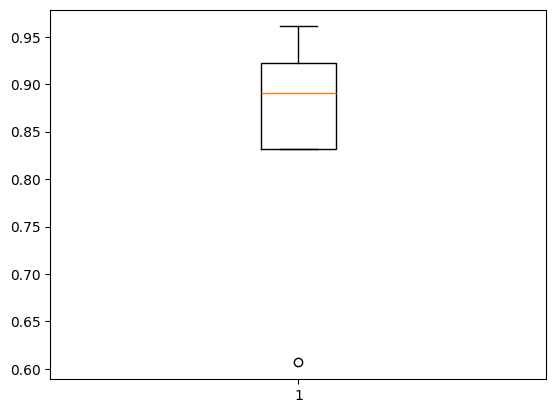

In [ ]:
# Avaliando o modelo sugerido no documento fornecido pelo tutor
evaluate_model(define_model())

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 186ms/step - accuracy: 0.2580 - loss: 2.0179 - val_accuracy: 0.3907 - val_loss: 1.7544
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 187ms/step - accuracy: 0.4650 - loss: 1.4922 - val_accuracy: 0.5402 - val_loss: 1.2998
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 187ms/step - accuracy: 0.5380 - loss: 1.2931 - val_accuracy: 0.5975 - val_loss: 1.1376
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 188ms/step - accuracy: 0.5794 - loss: 1.1804 - val_accuracy: 0.5683 - val_loss: 1.2873
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 198ms/step - accuracy: 0.6101 - loss: 1.1089 - val_accuracy: 0.6361 - val_loss: 1.0252
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 189ms/step - accuracy: 0.6349 - loss: 1.0416 - val_accuracy: 0.6306 - val_loss: 1.1006
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 186ms/step - accuracy: 0.6587 - loss: 0.9674 - val_accuracy: 0.6241 - val_loss: 1.1561
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 186ms/step - accuracy: 0.6679 -

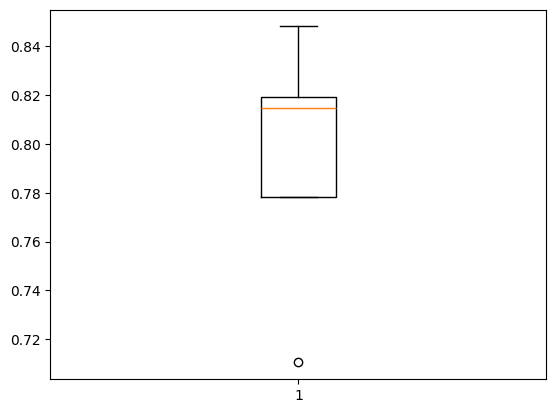

In [ ]:
# Treinamento para o modelo que performatico
evaluate_model(model_performance)

# Atividade 01
[Voltar ao Topo](#scrollTo=d2f857f3)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 45ms/step - accuracy: 0.3394 - loss: 1.8289 - val_accuracy: 0.4661 - val_loss: 1.4267 - learning_rate: 0.0010
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.5511 - loss: 1.2642 - val_accuracy: 0.5641 - val_loss: 1.2224 - learning_rate: 0.0010
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.6111 - loss: 1.1033 - val_accuracy: 0.6163 - val_loss: 1.0787 - learning_rate: 0.0010
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.6567 - loss: 0.9859 - val_accuracy: 0.5872 - val_loss: 1.1751 - learning_rate: 0.0010
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.6812 - loss: 0.9165 - val_accuracy: 0.5484 - val_loss: 1.3972 - learning_rate: 0.0010
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.7067 - loss: 0.8418 - val_accuracy: 0.6744 - val_loss: 0.9426 - learning_rate: 0.0010
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.7303 - l

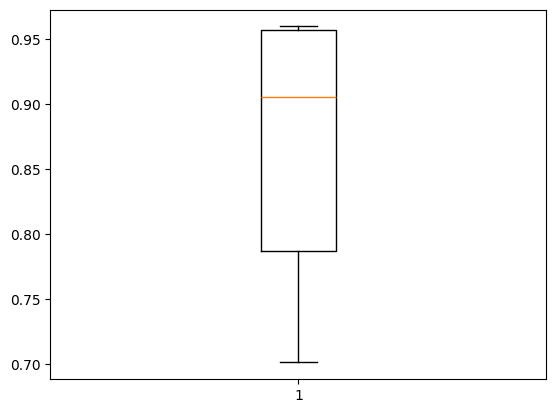

In [ ]:
 evaluate_model(model=model_atividade_um, callback=[lr_reuction_um])

# Atividade 02

[Voltar ao Topo](#scrollTo=d2f857f3)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 0.3121 - loss: 1.8993 - val_accuracy: 0.4201 - val_loss: 1.5958 - learning_rate: 0.0010
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.5097 - loss: 1.3721 - val_accuracy: 0.4809 - val_loss: 1.4424 - learning_rate: 0.0010
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.5715 - loss: 1.2171 - val_accuracy: 0.5178 - val_loss: 1.3845 - learning_rate: 0.0010
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.6013 - loss: 1.1241 - val_accuracy: 0.6020 - val_loss: 1.1460 - learning_rate: 0.0010
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.6359 - loss: 1.0497 - val_accuracy: 0.5118 - val_loss: 1.6682 - learning_rate: 0.0010
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.6547 - loss: 0.9904 - val_accuracy: 0.6164 - val_loss: 1.1060 - learning_rate: 0.0010
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.6675 - l

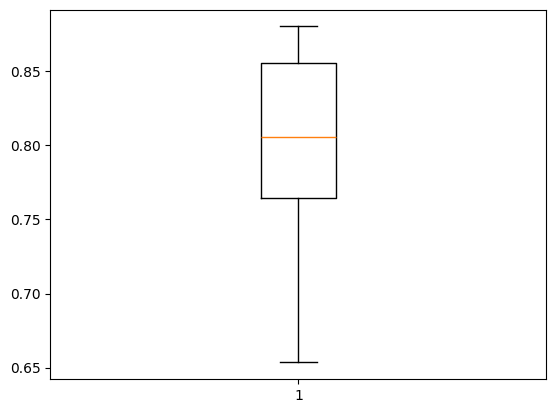

In [ ]:
evaluate_model(model=model_atividade_dois, callback=[lr_reuction_dois])